In [1]:
import os
import psutil

process = psutil.Process(os.getpid())
mem_mb = process.memory_info().rss / 1024 ** 2  # in MB

print(f"Notebook is using approximately {mem_mb:.2f} MB of RAM")

Notebook is using approximately 71.45 MB of RAM


# Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_circles, make_moons
from sklearn.model_selection import train_test_split
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [3]:
if '_ORIGINAL_PRINTOPTIONS' not in globals():
    import builtins
    _ORIGINAL_PRINTOPTIONS = np.get_printoptions()
    np.set_printoptions(threshold=10, edgeitems=2, linewidth=80, suppress=True)
    def print(*args, **kwargs):
        with np.printoptions(**_ORIGINAL_PRINTOPTIONS):
            return builtins.print(*args, **kwargs)

In [4]:
SEED = 42

# Example 1

## 📊 Dataset

In [5]:
# Generate an artificial dataset
X, y = make_moons(
    n_samples=100,  # 100 Beispiele (aka Datenpunkte) = 100 Zeilen
    noise=0.1,  # Standardabweichung für ein wenig Rauschen (macht das Problem ein wenig schwieriger)
    random_state=SEED  # random number generator can be seeded by providing a number to it -> allows to replicate random processes
)
X, y

(array([[ 1.58202308, -0.44581483],
        [ 0.0660451 ,  0.4392075 ],
        ...,
        [ 1.88739713, -0.01323424],
        [-0.03479039,  0.45164997]], shape=(100, 2)),
 array([1, 1, ..., 1, 1], shape=(100,)))

In [6]:
print(y)

[1 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 1 1 0 0 1 0 0 1 0 1 0 0 1 0 1 0 1
 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 1 1 1 1 0 1 1 0 1 1 1 1 0 1 0
 1 1 1 0 1 1 1 1 0 0 0 1 0 0 0 1 1 1 1 1 0 1 1 0 1 1]


In [7]:
pd.DataFrame(
    {
        "bboxes_volume_difference": X[:, 0],  # alle Zeilen der ersten Spalte
        "center_mass_geometric_center_difference": X[:, 1],  # alle Zeilen der zweiten Spalte
        "is_turning": y  # Diese Spalte enthält die sog. "Labels"="Targets", also was wir als Ergebnis von der KI erwarten
    }
)

,bboxes_volume_difference,center_mass_geometric_center_difference,is_turning
0,1.582023,-0.445815,1
1,0.066045,0.439207,1
2,0.736631,-0.398963,1
3,-1.056928,0.242456,0
4,-0.802162,0.202718,0
...,...,...,...
95,0.187867,-0.146732,1
96,0.936777,-0.518322,1
97,0.550221,0.724004,0
98,1.887397,-0.013234,1


<u>**Vokabular:**</u>
- **Labels**
    - In der Tabelle: `is_turning` Spalte (0=Frästeil, 1=Drehteil)
    - Bedeutung: Das was die KI als **Output** liefern sollte
- **Features**
    - In der Tabelle: Alle Spalten bis auf die für **Labels**
    - Bedeutung: Das was die KI als **Input** erhält, um Outputs zu liefern
- **Feature Vektor** oder **Embedding**
    - In der Tabelle: Eine Zeile (ohne Label)

### Split: Train vs. Test

In [8]:
# test_size=0.3 ==> 30% der Daten werden zu Testdaten
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)
X_train, X_test, y_train, y_test

(array([[-0.33031615,  0.9271263 ],
        [ 0.08486919,  1.08681791],
        ...,
        [ 1.66753652, -0.18840855],
        [ 1.08160772,  0.20640071]], shape=(70, 2)),
 array([[-0.21884785,  0.81507777],
        [-0.67983069,  0.69539912],
        ...,
        [ 0.92202981, -0.08438964],
        [ 0.18929423, -0.18514051]], shape=(30, 2)),
 array([0, 0, ..., 1, 0], shape=(70,)),
 array([0, 0, ..., 0, 1], shape=(30,)))

### Show Plot

In [9]:
def plot_2d_data(X, y, X_test=None, y_test=None, *, model=None, title="Model Decision Boundary"):
    """
    Plot the decision boundaries of a classifier along with the dataset points.

    Parameters:
    - X: The feature set (training data) of shape (N_samples, 2)
    - y: The target labels for the training data (binary class labels)
    - model: A trained classifier model
    - X_test: (optional) The feature set for the test samples (same shape as X)
    - y_test: (optional) The target labels for the test data
    - title: Title of the plot
    """
    if model is not None:
        # Create a plot with decision boundaries using DecisionBoundaryDisplay
        X_ = np.concat((X, X_test)) if X_test is not None else X
        DecisionBoundaryDisplay.from_estimator(
            model, X_, response_method="predict", cmap=ListedColormap(["#FFAAAA", "#AAAAFF"]), alpha=0.6, eps=0.5
        )
    else:
        plt.figure()

    # Plot the training points
    neg_idx = y==0
    X_neg, X_pos = X[neg_idx], X[~neg_idx]
    plt.scatter(X_neg[:, 0], X_neg[:, 1], c="#FF6347", marker="o", edgecolors="k", label="Train sample (class 0)", s=100)
    plt.scatter(X_pos[:, 0], X_pos[:, 1], c="#4682B4", marker="o", edgecolors="k", label="Train sample (class 1)", s=100)

    # Plot test data if provided with different symbol
    if X_test is not None and y_test is not None:
        neg_idx = y_test==0
        X_neg, X_pos = X_test[neg_idx], X_test[~neg_idx]
        plt.scatter(X_neg[:, 0], X_neg[:, 1], c="#FF6347", marker="x", label="Test sample (class 0)", s=150, linewidths=2)
        plt.scatter(X_pos[:, 0], X_pos[:, 1], c="#4682B4", marker="x", label="Test sample (class 1)", s=150, linewidths=2)

    plt.title(title, fontsize=14)
    plt.xlabel("bboxes_volume_difference", fontsize=12)
    plt.ylabel("center_mass_geometric_center_difference", fontsize=12)
    plt.legend(loc="upper right", bbox_to_anchor=(1.45, 1.025))
    plt.grid(True)
    plt.show()

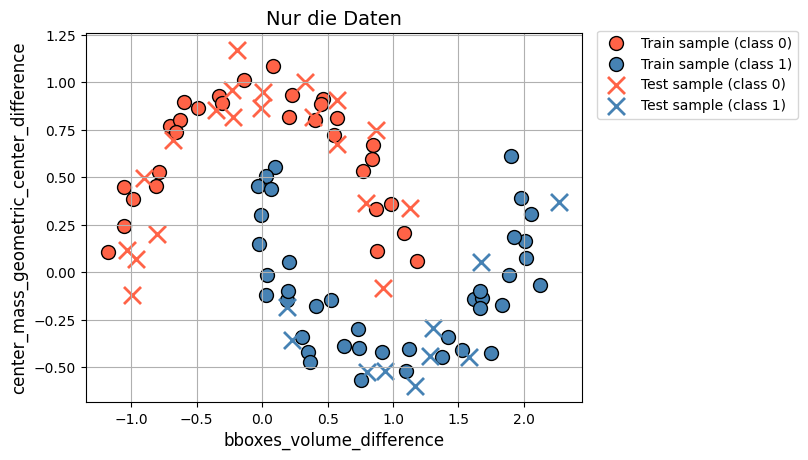

In [10]:
plot_2d_data(X_train, y_train, X_test, y_test, title="Nur die Daten")

<u>**Vokabular:**</u>
- **Klasse** = eine Kategorie/Gruppe o.Ä.
    - z.B. *Drehen* wäre eine Kategorie, *Fräsen* eine weitere Kategorie
    - hier haben wir es deshalb mit einem binären Klassifikationsproblem zu tun

## ✨ Model 🤖

### Training

In [11]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

<u>**Vokabular:**</u>
- `fit` (also anpassen) des Modells = **Lernen** = **Training** = Herausbilden dieser **Entscheidungsgrenze** = Algorithmus läuft, der **Regeln ableitet**

### Evaluate = Test...

#### ...visually

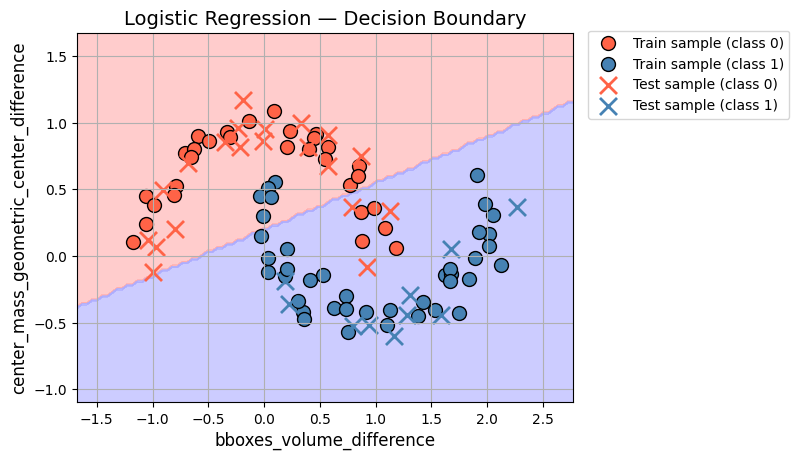

In [12]:
plot_2d_data(X_train, y_train, X_test, y_test, model=model, title="Logistic Regression — Decision Boundary")

#### ...quantitatively

In [13]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
y_train_pred, y_test_pred

(array([0, 0, ..., 1, 1], shape=(70,)), array([0, 0, ..., 1, 1], shape=(30,)))

In [14]:
def accuracy(y_pred, y_true):
    print("Accuracy:", (y_pred==y_true).sum() / len(y_pred))

In [15]:
print("--- Train ---")
accuracy(y_train_pred, y_train)
print("--- Test ---")
accuracy(y_test_pred, y_test)

--- Train ---
Accuracy: 0.8571428571428571
--- Test ---
Accuracy: 0.9


<u>**Vokabular:**</u>
- **Metriken (*engl.* Metrics)**
    - Treffergenauigkeit (*engl.* **Accuracy**) ist sehr beliebt/bekannt
    - Gibt viele versch. im Bereich ML (F1-Score, Precision, Recall, etc.)
- `predict` (also vorhersagen) = Modell schaut sich **Inputs** an und produziert **Outputs** (pro Feature Vektor ein Output)
    - Geht nur, wenn Modell trainiert wurde, also nach `fit`
    - Unser process predictor Service nutzt diese Methode, um Teile zu klassifizieren

## 💻 YOUR TURN — Train Your Own Model

1. Wähle ein Modell, z.B. aus folgender Liste:
    - [Decision Tree Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#)
    - [Support Vector Machine (linear)](https://scikit-learn.org/1.6/modules/generated/sklearn.svm.LinearSVC.html#)
    - [Support Vector Classifier (beyond linear)](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)
    - ...
2. Lass das Training laufen
3. Visualisiere das Modell
4. Evaluiere das Modell via der Treffergenauigkeit (Accuracy)

---

Wenn du Zeit hast, kannst du dir einen Modellvergleich von scikit-learn anschauen. $\rightarrow$ Klicke, um weiteres [Binder zu öffnen](https://mybinder.org/v2/gh/scikit-learn/scikit-learn/1.6.X?urlpath=lab/tree/notebooks/auto_examples/classification/plot_classifier_comparison.ipynb)

In [16]:
# instantiate and train the model

# visualize the model

# perform predictions

# compute accuracy

### Solution

#### Simple ML pipeline



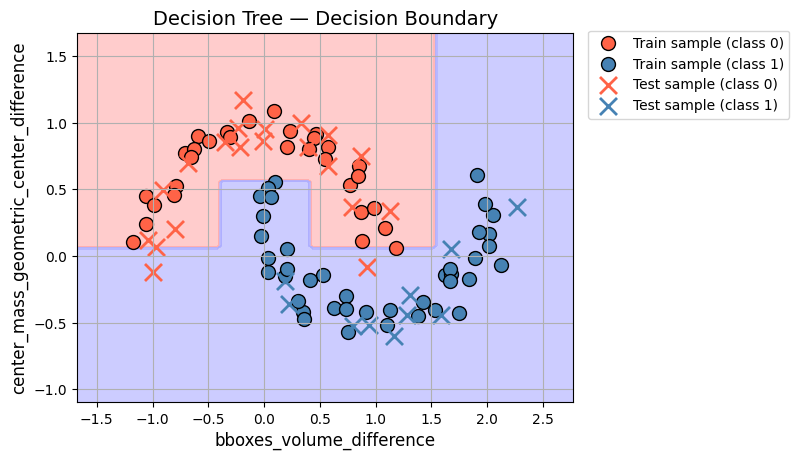

Accuracy: 1.0
Accuracy: 0.9333333333333333


In [17]:
from sklearn.tree import DecisionTreeClassifier

# create basic model instance and train
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# evaluate model visually
plot_2d_data(X_train, y_train, X_test, y_test, model=model, title="Decision Tree — Decision Boundary")

# perform predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# evaluate model quantitatively
accuracy(y_train_pred, y_train)
accuracy(y_test_pred, y_test)

In [18]:
from sklearn.tree import plot_tree

def visualize_decision_tree(model, save_path=None):
    plt.figure(figsize=(12, 10))
    plot_tree(
        model,
        filled=True,
        feature_names=["bboxes_volume_difference", "center_mass_geometric_center_difference"],
        class_names=["fräsen", "drehen"],  # 0=fräsen, 1=drehen
        rounded=True,
        fontsize=10
    )
    if save_path:
        plt.savefig(save_path)
    plt.show()

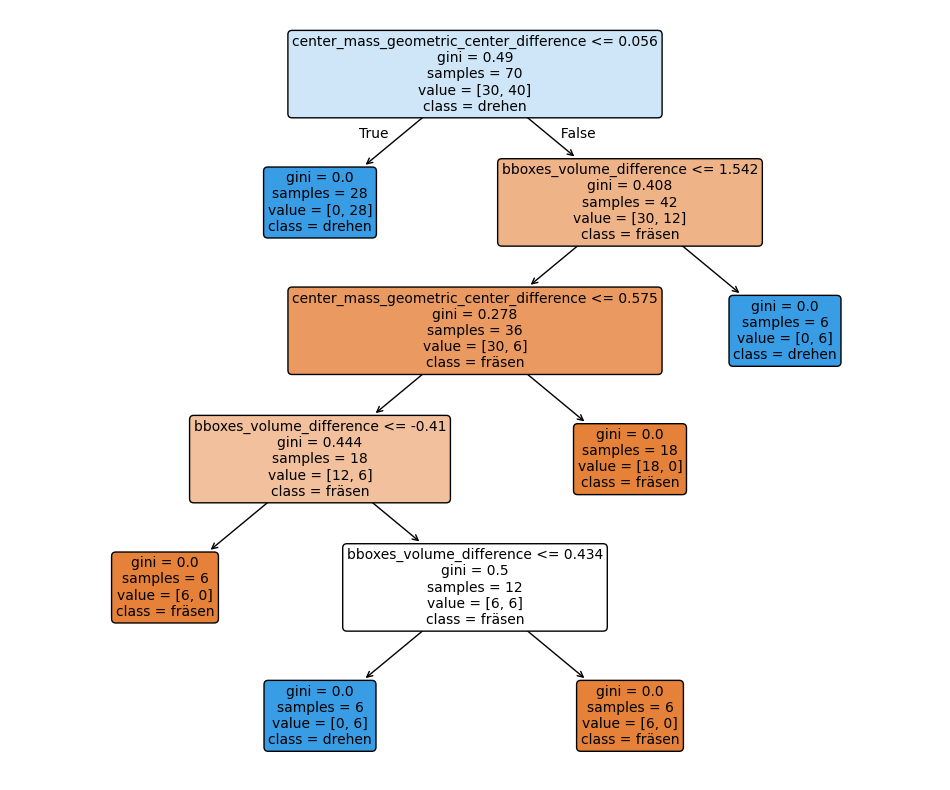

In [19]:
visualize_decision_tree(model)

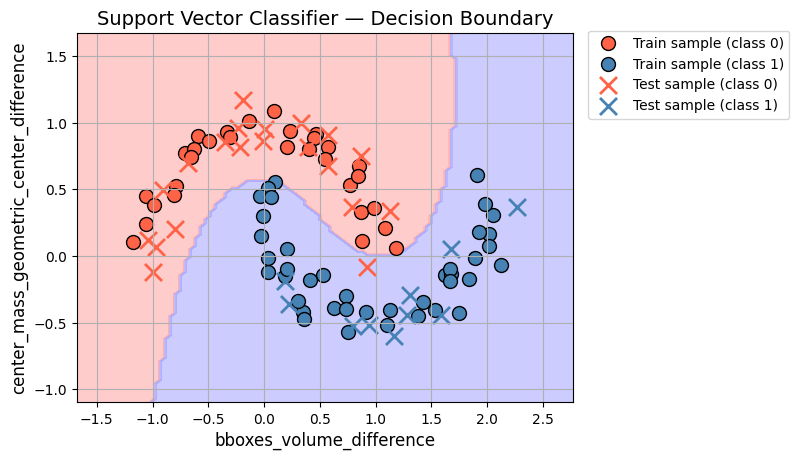

Accuracy: 1.0
Accuracy: 0.9666666666666667


In [20]:
from sklearn.svm import SVC

# create basic model instance and train
model = SVC()
model.fit(X_train, y_train)

# evaluate model visually
plot_2d_data(X_train, y_train, X_test, y_test, model=model, title="Support Vector Classifier — Decision Boundary")

# perform predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# evaluate model quantitatively
accuracy(y_train_pred, y_train)
accuracy(y_test_pred, y_test)

## 🔎 Look under the hood (Mathematical)

### Mathematische Erklärung

🧠 Wie ein **Logistic Regression**-Modell funktioniert

Wir wollen einen **Klassifikator**, der aus Daten lernen kann – das heißt, er soll aus Beispielen lernen, wie man gute Vorhersagen für neue Daten trifft.

Dazu definieren wir eine Funktion, die eine Datenprobe $x$ aufnimmt und sie mithilfe der Gleichung transformiert:

$$
f(x) = w^\top x + b
$$

Das ist eine **lineare Transformation** (genauer gesagt eine **affine**, wegen des Bias $b$), wobei:

- $w$ = Gewichte (je eines pro Merkmal)
- $b$ = Bias (ein konstanter Offset)

Das sind die sogenannten **lernbaren Parameter** des Modells.  
Lernen bedeutet, dass der Algorithmus versucht, die richtigen Werte für $w$ und $b$ zu finden, damit das Modell gute Vorhersagen liefert.

---

🎯 Was bedeutet „gut“?

In diesem Fall heißt „gut“, dass die Vorhersagen zu den tatsächlichen Labels $y$ passen.  
Aber hier kommt der Haken: $f(x)$ kann irgendeine reelle Zahl zwischen $-\infty$ und $+\infty$ sein. Das hilft uns nicht weiter, wenn wir eine **Wahrscheinlichkeit** (eine Zahl zwischen $0$ und $1$) wollen.

Deshalb wenden wir eine **nichtlineare Stauchfunktion** namens **Sigmoid** an (google sie; ist die kumulative Verteilungsfunktion einer Normalverteilung):

$$
\sigma(z) = \frac{1}{1 + \text{exp}(-z)} \in (0, 1)
$$

Zusammen ergibt sich:

$$
\tilde{y} = \sigma(f(x)) = \sigma(w^\top x + b)
$$

Jetzt ist $\tilde{y}$ (auch `y_pred` genannt) die vorhergesagte Wahrscheinlichkeit, dass die Klasse $1$ ist.

---

⚙️ Wie lernt das Modell?

<u>**Kurzfassung (TL;DR):**</u>

Wir vergleichen den vorhergesagten Wert `y_pred` mit dem tatsächlichen Label `y_true` und berechnen den **Fehler** (*engl.* loss oder error) mit der **binären Kreuzentropie** (Log-Loss).  
Das sagt uns, wie „schlecht“ eine Vorhersage ist.

Dann verwenden wir **Gradientenabstieg**, um die Parameter $w$ und $b$ zu **aktualisieren**, sodass der Fehler **minimiert** wird.  
> Stell dir vor, du stehst unter der Dusche und drehst an den Knöpfen, um heißes und kaltes Wasser zu mischen, bis die Temperatur stimmt. Genauso ist es hier: $w$ und $b$ sind die Knöpfe, die wir anpassen, um ein Modell zu finden, das oft richtige Ergebnisse liefert!

Anders gesagt: Wir machen kleine Schritte in die Richtung, die das Modell besser macht.

Diesen Prozess wiederholen wir viele Male (Epochen), und das Modell lernt schrittweise bessere Parameter.

<u>**Langfassung:**</u>

Wir vergleichen den vorhergesagten Wert $\tilde{y} = \sigma(w^\top x + b)$ mit dem tatsächlichen Label $y$ und berechnen den **Fehler** mit der **binären Kreuzentropie**:

$$
\mathcal{l}(w, b) = - \left[ y \log(\tilde{y}) + (1 - y) \log(1 - \tilde{y}) \right]
$$

Für den gesamten Datensatz mit $n$ Beispielen gilt:

$$
\mathcal{L}(w, b) = \frac{1}{n} \sum_{i=1}^n \mathcal{l}^{(i)} = - \frac{1}{n} \sum_{i=1}^n \left[ y^{(i)} \log(\tilde{y}^{(i)}) + (1 - y^{(i)}) \log(1 - \tilde{y}^{(i)}) \right]
$$

Um $\tilde{y}$ möglichst nahe an $y$ zu bringen, minimieren wir diesen Fehler mittels **Gradientenabstieg**.  
Das bedeutet, wir berechnen die Gradienten des Fehlers bezüglich der Parameter:

- Gradient bezüglich der Gewichte:
  $$
  \frac{\partial \mathcal{L}}{\partial w} = \frac{1}{n} \sum_{i=1}^n (\tilde{y}^{(i)} - y^{(i)}) \cdot x^{(i)}
  $$

- Gradient bezüglich des Bias:
  $$
  \frac{\partial \mathcal{L}}{\partial b} = \frac{1}{n} \sum_{i=1}^n (\tilde{y}^{(i)} - y^{(i)})
  $$

Wir aktualisieren $w$ und $b$, indem wir kleine Schritte in Richtung des negativen Gradienten machen.  
Das wiederholen wir viele Male – das Modell verbessert sich schrittweise (der Fehler ist konvex in Bezug auf $w$ und $b$).

---

Wie machen wir Vorhersagen?

Wenn das Training abgeschlossen ist, **behalten wir die gelernten Werte für $w$ und $b$** und berechnen für jedes neue Beispiel $x$ einfach:

$$
\tilde{y} = \sigma(w^\top x + b)
$$

Wenn $\tilde{y} \gt 0{,}5$, sagen wir Klasse $1$ voraus, andernfalls Klasse $0$.

---

🤖 BONUS

Neuronale Netze machen **genau dasselbe** – **aber statt nur einer Transformation** verketten sie viele davon.  
Jede Schicht wendet eine Funktion wie $f(x) = Wx + b$ an, gefolgt von einer nichtlinearen Aktivierung. Das gesamte Netzwerk wird mit derselben Idee trainiert: **Gradientenabstieg basierend auf einer Fehlerfunktion**.

Logistische Regression ist also quasi der einfachste Baustein in Deep Learning.

### Logistic Regression From Scratch

In [21]:
from sklearn.base import BaseEstimator, ClassifierMixin

class MyLogisticRegression(BaseEstimator, ClassifierMixin):
    def __init__(self, lr=0.01, max_iter=1000):
        self.lr = lr
        self.max_iter = max_iter
        self.weights = None
        self.bias = None
    
    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.max_iter):
            z = np.dot(X, self.weights) + self.bias
            y_pred = self._sigmoid(z)

            # Gradient descent
            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))  # gradient of loss wrt. weights vector
            db = (1 / n_samples) * np.sum(y_pred - y)  # derivative of loss wrt. bias scalar

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

        # for sklearn compatibility
        self.coef_ = self.weights
        self.intercept_ = self.bias
        self.classes_ = np.unique(y)
        self.n_features_in_ = X.shape[1]

    def predict_proba(self, X):
        z = np.dot(X, self.weights) + self.bias
        return self._sigmoid(z)
    
    def predict(self, X):
        proba = self.predict_proba(X)
        return (proba > 0.5).astype(int)

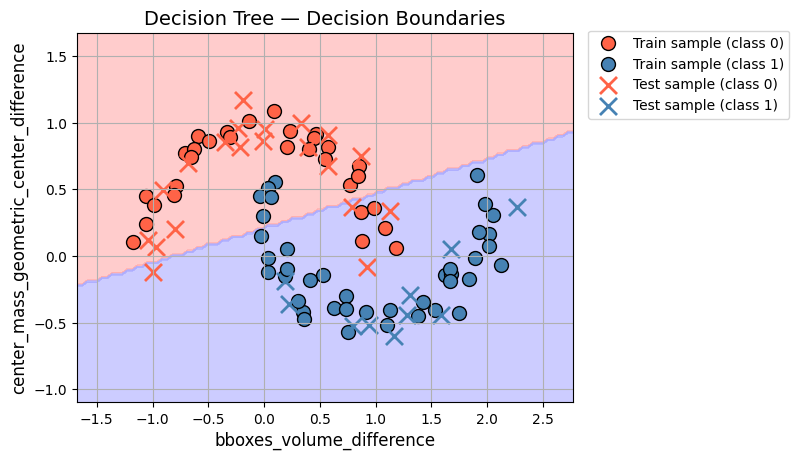

Accuracy: 0.8571428571428571
Accuracy: 0.8666666666666667


In [22]:
model = MyLogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

# evaluate model visually
plot_2d_data(X_train, y_train, X_test, y_test, model=model, title="Decision Tree — Decision Boundaries")

# perform predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# evaluate model quantitatively
accuracy(y_train_pred, y_train)
accuracy(y_test_pred, y_test)

## 🛠️ Feature Engineering

**Probiere einen neuen Datensatz aus und sieh dir an, wie gut das Modell standardmäßig abschneidet (ohne Feature Engineering)**

In [23]:
X, y = make_circles(  # Or use make_moons(n_samples=100, noise=0.1)
    n_samples=100,
    factor=0.5,
    noise=0.1,
    random_state=SEED
)

def training_pipeline(*, X, y, model, with_plot: bool = False):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED, stratify=y)
    
    model.fit(X_train, y_train)

    if with_plot:
        # evaluate model visually
        plot_2d_data(X_train, y_train, X_test, y_test, model=model, title="Decision Boundary")
    
    # perform predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # evaluate model quantitatively
    print("--- Train ---")
    accuracy(y_train_pred, y_train)
    print("--- Test ---")
    accuracy(y_test_pred, y_test)

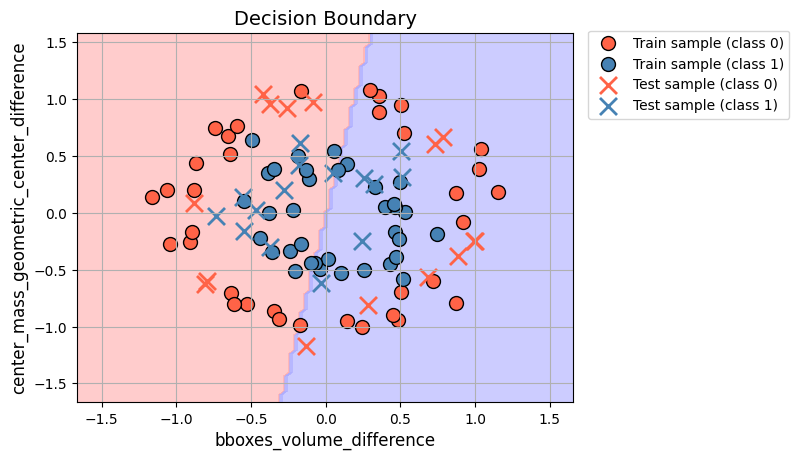

--- Train ---
Accuracy: 0.5142857142857142
--- Test ---
Accuracy: 0.43333333333333335


In [24]:
training_pipeline(X=X, y=y, model=MyLogisticRegression(), with_plot=True)

#### Create New Feature

**Jetzt mit Feature Engineering – das heißt, wir als Menschen überlegen uns, wie die Daten umgewandelt werden könnten, um dem Modell zu helfen.**

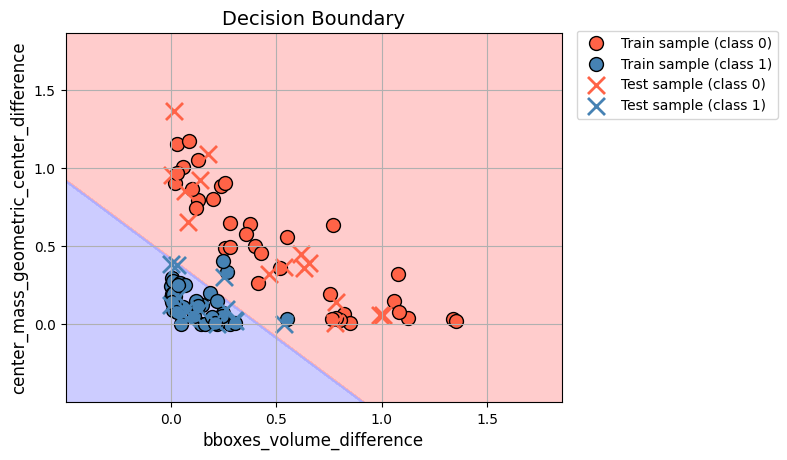

--- Train ---
Accuracy: 0.9571428571428572
--- Test ---
Accuracy: 0.9333333333333333


In [25]:
X_new = X**2  # square everything, the 2D donut data would look a bowl in 3d (X[:, 2] = X[:, 0]**2 + X[:, 1]**2 would be the third feature)
training_pipeline(X=X_new, y=y, model=MyLogisticRegression(), with_plot=True)

#### Scale Features
Manche Modelle sind nicht unabhängig von der Skalierung der Daten  
$\implies$ Skalierung auf $\text{Durschnitt}=\mu=0$ und $\text{Standardabweichung}=\sigma=1$ hilft

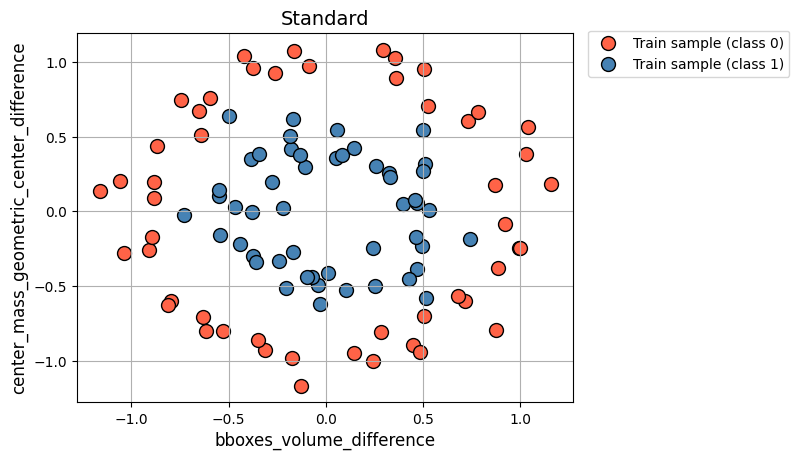

Mittelwert: [ 0.00478926 -0.00396879] 	Standardabweichung [0.56309332 0.56890655]


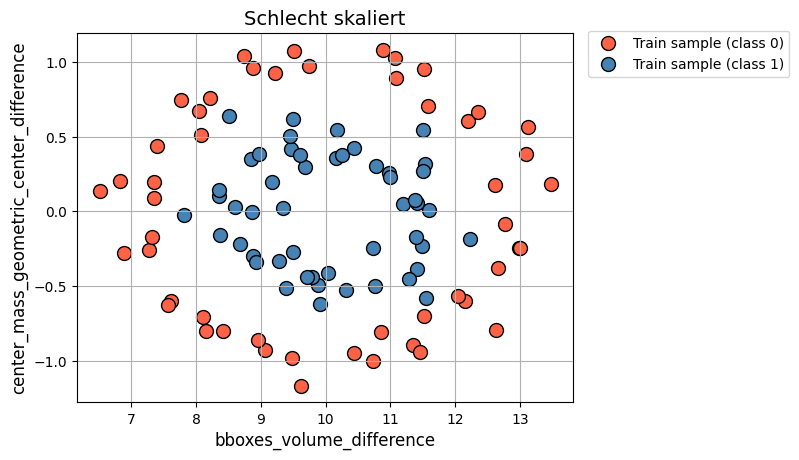

Mittelwert: [ 1.00143678e+01 -3.96879026e-03] 	Standardabweichung [1.68927996 0.56890655]


In [26]:
# lasst uns mal vergleichen (ein Feature in X_new wird jetzt drastisch anders skaliert)
mu = 10
sigma = 3

X_new = X.copy()
X_new[:, 0] = X_new[:, 0] * sigma + mu
plot_2d_data(X, y, title="Standard")
print("Mittelwert:", X.mean(axis=0), "\tStandardabweichung", X.std(axis=0))
plot_2d_data(X_new, y, title="Schlecht skaliert")
print("Mittelwert:", X_new.mean(axis=0), "\tStandardabweichung", X_new.std(axis=0))

**Vergleich von Modellen, die Skalierung brauchen vs. keine Skalierung brauchen**

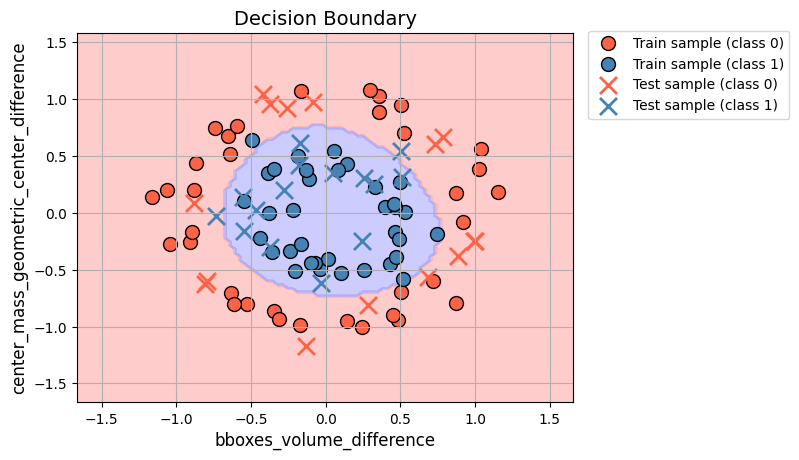

--- Train ---
Accuracy: 0.9857142857142858
--- Test ---
Accuracy: 0.9333333333333333


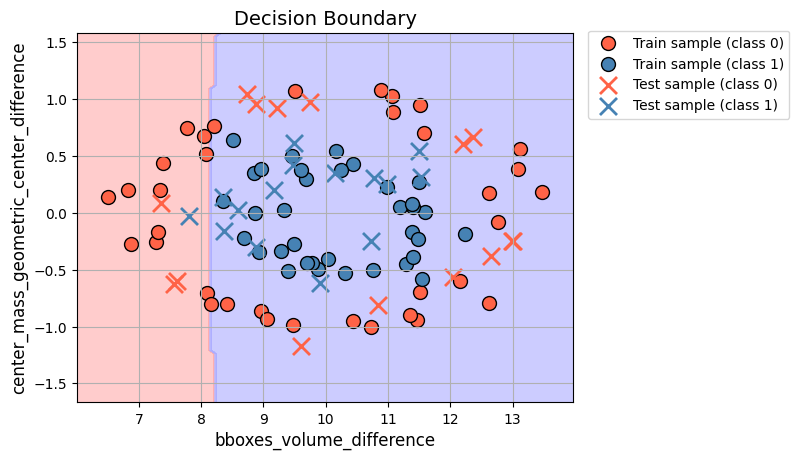

--- Train ---
Accuracy: 0.6571428571428571
--- Test ---
Accuracy: 0.5666666666666667


In [27]:
training_pipeline(X=X, y=y, model=SVC(), with_plot=True)
training_pipeline(X=X_new, y=y, model=SVC(), with_plot=True)

#### 💻 YOUR TURN — Scale the Data

Skaliert die Features von `X_new` so, dass sie $\mu=0$ und $\sigma=1$ haben.  
Denkt daran, dass ich die Daten selbst schon mal geändert habe und zwar via
```python
X_new[:, 0] = X_new[:, 0] * sigma + mu.
```
Also erst mal multiplizieren, dann addieren. Um das rückgängig zu machen ist die Operationsreihenfolge also erst mal subtrahieren, dann dividieren. Nutzt aber nicht meine sigma und mu Werte, sondern `mu = X_new.mean(axis=0)` (Durchschnittswert für jedes Feature) und `sigma = X_new.std(axis=0)` (Standardabweichung für jedes Feature).

In [28]:
# Daten skalieren

# Pipeline anwenden
# training_pipeline(X=X_new, y=y, model=SVC(), with_plot=True)

##### Lösung

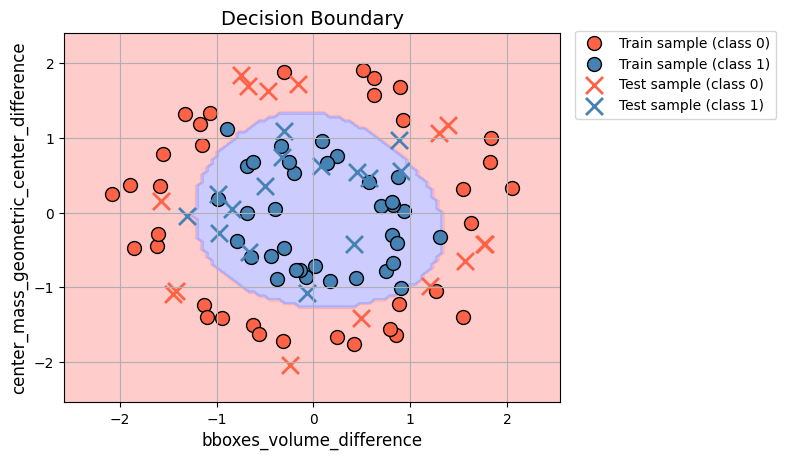

--- Train ---
Accuracy: 0.9857142857142858
--- Test ---
Accuracy: 0.9333333333333333


In [29]:
# Daten skalieren
mu, std = X_new.mean(axis=0), X_new.std(axis=0)
X_new = (X_new - mu) / std

# Pipeline anwenden
training_pipeline(X=X_new, y=y, model=SVC(), with_plot=True)

##### Bessere Lösung

⚠️ Der Skalierer ist Teil des Modells! Das Modell lernt ja die Entscheidungsgrenze für skalierte Daten, d.h. wenn der Nutzer Daten hochlädt und unsere API sie weiterleitet zu unserem Modell, dann müssen sie vorher skaliert werden, also müssten wir uns die Werte für `mu` und `sigma` merken fürs Deployment.

✅ Scikit-Learn hat dafür etwas erstellt, und zwar Pipelines und einen Skalierer mit dem selben Interface wie die Modelle auch

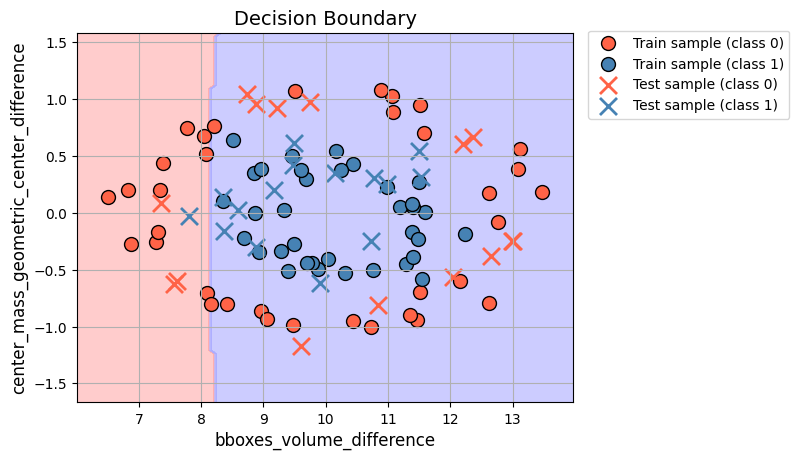

--- Train ---
Accuracy: 0.6571428571428571
--- Test ---
Accuracy: 0.5666666666666667


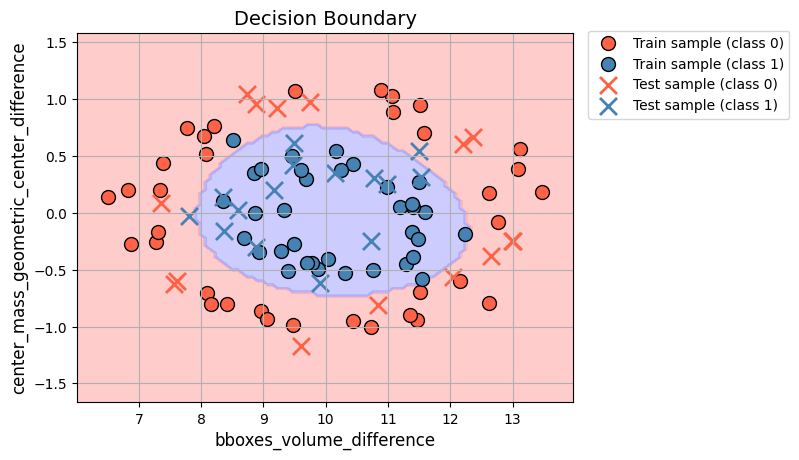

--- Train ---
Accuracy: 0.9857142857142858
--- Test ---
Accuracy: 0.9333333333333333


In [30]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Daten wieder schlecht skalieren
X_new = X_new * std + mu

# Pipeline ist quasi wie ein Modell, hat das gleiche Interface, daher nutzt es auch einfach so.
pipeline = Pipeline([
        ("scaler", StandardScaler()),  # StandardScaler übernimmt das Skalieren und merkt sich auch die Werte
        ("classifier", SVC())  # hier könnte jegliches Scikit-learn Modell verwendet werden
    ])
training_pipeline(X=X_new, y=y, model=SVC(), with_plot=True)
training_pipeline(X=X_new, y=y, model=pipeline, with_plot=True)

**Manche Modelle wie der Entscheidungsbaum sind invariant gegenüber Datenskalierung**

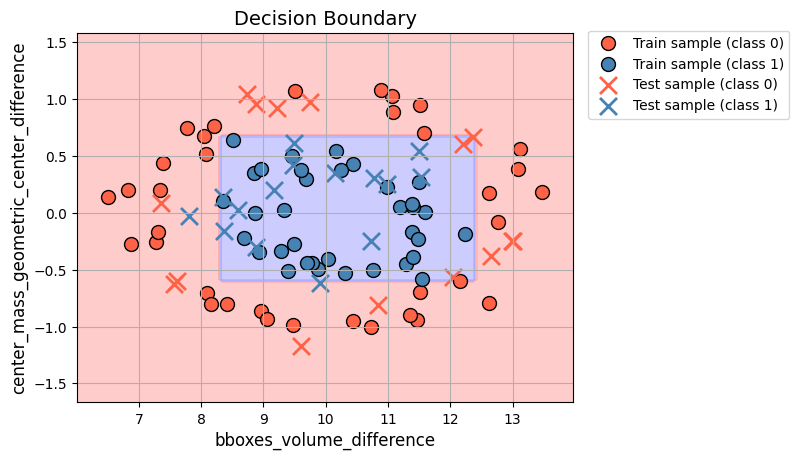

--- Train ---
Accuracy: 1.0
--- Test ---
Accuracy: 0.8333333333333334


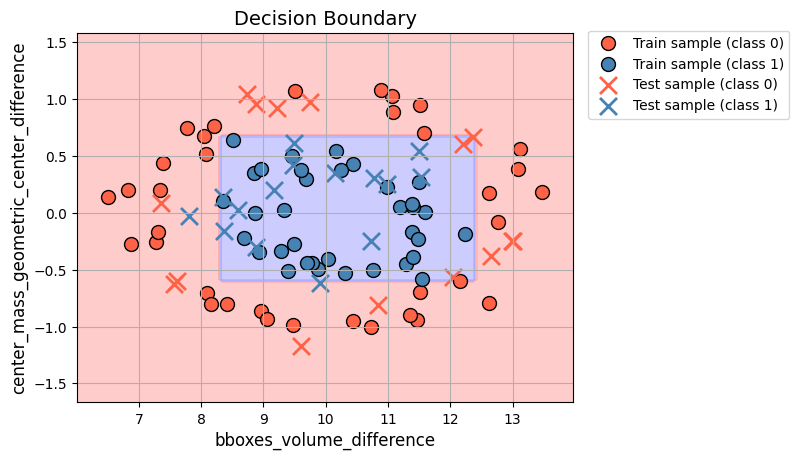

--- Train ---
Accuracy: 1.0
--- Test ---
Accuracy: 0.8333333333333334


In [31]:
pipeline = Pipeline([
        ('scaler', StandardScaler()),  # StandardScaler übernimmt das Skalieren und merkt sich auch die Werte
        ('classifier', DecisionTreeClassifier())  # hier könnte jegliches Scikit-learn Modell verwendet werden
    ])
training_pipeline(X=X_new, y=y, model=DecisionTreeClassifier(), with_plot=True)
training_pipeline(X=X_new, y=y, model=pipeline, with_plot=True)

# Fazit 1

- Daten in Train & Test teilen
- Daten sollten skaliert werden
- Verschiedene Modelle kommen mit verschiedenem Freiheitsgrad. Unter der Motorhaube funktionieren sie verschieden, was die Entscheidungsgrenze angeht, aber sie alle optimieren eine Zielfunktion auf Basis von Feedback durch den Soll-Ist-Abgleich: Was sollte rauskommen (`y_true`) vs. was ist rausgekommen (`y_pred`).
- Modelle können verbessert werden, indem wir auf der Seite der Daten aushelfen (Feature Engineering, informativere Spalten hinzufügen, etc.)

---

**Folgender Codeausschnitt fasst alles Bisherige zusammen:**

```python
pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', DecisionTreeClassifier())
    ])
training_pipeline(X=X, y=y, model=pipeline, with_plot=True)
```

# Example 2

## 📊 Dataset

In [32]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [33]:
from sklearn.datasets import load_iris

iris_dict = load_iris(return_X_y=False, as_frame=True)
df = iris_dict["frame"]
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [34]:
df.value_counts("target")

target
0    50
1    50
2    50
Name: count, dtype: int64

In [35]:
X = iris_dict["data"].values
y = iris_dict["target"].values
X, y

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        ...,
        [6.2, 3.4, 5.4, 2.3],
        [5.9, 3. , 5.1, 1.8]], shape=(150, 4)),
 array([0, 0, ..., 2, 2], shape=(150,)))

### Split: Train vs. Test

Auch mit mehr als 2 Features und mehr als 2 Klassen bleibt das Splitting gleich!

In [36]:
# mit stratify=y werden Daten so geteilt, dass jede Klasse gleich oft vorkommt
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=SEED)
X_train, X_test, y_train, y_test

(array([[5.1, 2.5, 3. , 1.1],
        [6.2, 2.2, 4.5, 1.5],
        ...,
        [5.6, 2.7, 4.2, 1.3],
        [4.6, 3.1, 1.5, 0.2]], shape=(105, 4)),
 array([[7.3, 2.9, 6.3, 1.8],
        [6.1, 2.9, 4.7, 1.4],
        ...,
        [6.5, 3. , 5.2, 2. ],
        [6.6, 2.9, 4.6, 1.3]], shape=(45, 4)),
 array([1, 1, ..., 1, 0], shape=(105,)),
 array([2, 1, ..., 2, 1], shape=(45,)))

### ⚠️ Show Plot?

Wir können die Daten inzwischen nicht mehr wirklich gut visualisieren – es gibt einfach zu viele **Dimensionen**.
Man könnte versuchen, eine Dimensionsreduktion anzuwenden oder mit Farben und Symbolen als zusätzliche Dimensionen auf den kartesischen Achsen zu experimentieren,
aber du verstehst, worauf es hinausläuft: <font color="red">**Je mehr Dimensionen, desto schwieriger wird die Visualisierung**</font>

Wir könnten an dieser Stelle auch eine *explorative Datenanalyse* (**EDA**) durchführen – zum Beispiel Verteilungen pro Merkmal prüfen, Korrelationen zwischen Features untersuchen usw.
Aber das ist gerade nicht unser Fokus.

**Stattdessen wollen wir nun sehen, wie wir maschinelles Lernen einsetzen können, um das beste Modell für dieses Problem zu finden.**

## ✨ Model 🤖

### Training

funktioniert immer noch mit dem gleichen Workflow

In [37]:
from sklearn.svm import SVC

model = SVC()
model.fit(X_train, y_train)

SVC()

### Evaluate = Test...

#### ...visually

Ohne spezielle Tricks wie Dimensionsreduktion o.Ä. haben wir zu viele Dimensionen, um sie anschaulich zu visualisieren $\implies$ Wir arbeiten nur noch mit Zahlen!

In [38]:
try:
    # evaluate model visually
    plot_2d_data(X_train, y_train, X_test, y_test, model=model, title="Support Vector Classifier — Decision Boundary")
except Exception as e:
    print("Error:", e)

Error: n_features must be equal to 2. Got 4 instead.


#### ...quantitavely

In [39]:
# perform predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# evaluate model quantitatively
accuracy(y_train_pred, y_train)
accuracy(y_test_pred, y_test)

Accuracy: 0.9714285714285714
Accuracy: 0.9555555555555556


# Example 3 — Regression
Jetzt trennen wir Datenpunkte nicht mehr voneinander, um zu klassifizieren (Gruppen zuzuordnen), sondern wir wollen eine Linie malen, die sich der *echten* Linie anschmiegt, z.B. den Preis von etwas ($y$) basierend auf anderen Infos (Features $X$) einschätzt. Das ist ein sog. **Regressionsproblem**.

<u>**Vokabular**</u>:
- **Klassifikation**: Outputs sind Kategorien/Klassen (Werkzeugtyp, Maschinentyp, Werkstoffgruppe, etc.)
- **Regression**: Outputs sind kontinuierlich (Preis, Gewicht, Schnittgeschwindigkeit, etc.)

In [40]:
from sklearn.datasets import fetch_california_housing

X, y = fetch_california_housing(as_frame=True, return_X_y=True)
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [41]:
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64

## Simple Pipeline

In [42]:
# kein stratify=y mehr, weil
# ohne Kategorien ein faires aufteilen der Daten auf Basis von Kategorien nicht möglich ist
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)
X_train, X_test, y_train, y_test

(       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
 7061   4.1312      35.0  5.882353   0.975490      1218.0  2.985294     33.93   
 14689  2.8631      20.0  4.401210   1.076613       999.0  2.014113     32.79   
 17323  4.2026      24.0  5.617544   0.989474       731.0  2.564912     34.59   
 10056  3.1094      14.0  5.869565   1.094203       302.0  2.188406     39.26   
 15750  3.3068      52.0  4.801205   1.066265      1526.0  2.298193     37.77   
 ...       ...       ...       ...        ...         ...       ...       ...   
 11284  6.3700      35.0  6.129032   0.926267       658.0  3.032258     33.78   
 11964  3.0500      33.0  6.868597   1.269488      1753.0  3.904232     34.02   
 5390   2.9344      36.0  3.986717   1.079696      1756.0  3.332068     34.03   
 860    5.7192      15.0  6.395349   1.067979      1777.0  3.178891     37.58   
 15795  2.5755      52.0  3.402576   1.058776      2619.0  2.108696     37.77   
 
        Longitude  
 7061 

✅ Scikit-Learn hat auch Modelle für Regressionsprobleme:
- [Linear Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
- [Support Vector Regressor (SVR)](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html)
- [Decision Tree Regressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)

In [43]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [44]:
def mse(y1, y2):
    """
    Mean Squared Error (MSE).
    Argumentreihenfolge ist egal also MSE(a, b) = MSE(b, a)
    """
    loss = ((y1 - y2)**2).mean()
    print("Mean squared error:", loss)
    return loss

def rmse(y1, y2):
    """
    Root Mean Squared Error (RMSE)
    Argumentreihenfolge ist egal also RMSE(a, b) = RMSE(b, a)
    """
    loss = ((y1 - y2)**2).mean()**0.5
    print("Root mean squared error:", loss)
    return loss

In [45]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("--- Train ---")
rmse(y_train, y_train_pred)
print("--- Test ---")
rmse(y_test, y_test_pred)
""

--- Train ---
Root mean squared error: 0.7234346057708156
--- Test ---
Root mean squared error: 0.7284008391515456


''

## Hyperparameter

So gut wie jedes Modell kommt mit Einstellungen, die die Performance. Bei Entscheidungsbäumen sind es z.B. Beschränkungen, was die Anzahl an Kinderknoten, Blattknoten, etc. angeht. Das Modell lernt zwar aus den Daten, aber wir haben auch in der Präsi gesehen, dass manchmal kurvige Linien besser sein können als strikt gerade Linien. Diese Einstellungen sind Hyperparameter.

<u>**Vokabular:**</u>
- **Hyperparameter**: Parameter (Einstellungen), die ein Mensch setzt, also nicht von der Maschine gelernt werden
- **Hyperparametersuche**: Ein Entscheidungsbaum mit Einstellungen A ist nicht der selbe wie mit Einstellungen B. Daher ist jede verschiedene Einstellungsmöglichkeit wie ein neues Modell. Wir suchen nach dem besten Modell, daher suchen wir durch verschiedene Modelle und deren verschiedenen Einstellungsmöglichkeiten (=Hyperparametersuche).

In [46]:
model = LinearRegression(positive=True)
model.fit(X_train, y_train)

LinearRegression(positive=True)

In [47]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("--- Train ---")
rmse(y_train, y_train_pred)
print("--- Test ---")
rmse(y_test, y_test_pred)
""

--- Train ---
Root mean squared error: 0.809676671833924
--- Test ---
Root mean squared error: 0.8028033672323281


''

**Wir haben eine Einstellung ausprobiert, die dazu geführt hat, dass wir ein schlechteres Ergebnis erhalten haben!**

## 💻 YOUR TURN — Suche nach dem besten Modell

- Oben gibt es eine Liste an Regressionsmodellen. Unten sind einige wenige Einstellungsmöglichkeiten genannt:
- [Linear Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
    - `LinearRegression(positive=False)` vs. `LinearRegression(positive=True)`
- [Support Vector Regressor (SVR)](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html)
    - `SVR(kernel="rbf")` vs. `SVR(kernel="poly", degree=5)`
    - `SVR(gamma="scale")` vs. `SVR(gamma="auto")`
    - etc.
- [Decision Tree Regressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)
    - `DecisionTreeRegressor(max_depth=None)` vs. `DecisionTreeRegressor(max_depth=7)`
    - `DecisionTreeRegressor(min_samples_split=2)` vs. `DecisionTreeRegressor(min_samples_split=10)`
    - etc.

**Spoiler**: Die Menge an Einstellungsmöglichkeiten explodiert, also man kann nicht jede Konstellation durchsuchen.

In [48]:
# Nimm irgendein Modell von oben
# (bei SVR kann es sein, dass die Sandbox abstürzt, weil RAM begrenzt ist auf ca. 1-2 GB und SVR viel beansprucht)
# Trainiere und teste es, wie bereits oben gezeigt

### Lösung

In [49]:
from sklearn.tree import DecisionTreeRegressor
pipelines = [
    Pipeline([
        ("scaler", StandardScaler()),
        ("model", DecisionTreeRegressor(min_samples_split=10, max_depth=7))
    ]),
    Pipeline([
        ("scaler", StandardScaler()),
        ("model", DecisionTreeRegressor(min_samples_split=2, max_depth=None))
    ]),
    Pipeline([
        ("scaler", StandardScaler()),
        ("model", DecisionTreeRegressor(min_samples_split=5, max_depth=5))
    ])
]
for i, pipeline in enumerate(pipelines):
    print(f"--> Model with index {i}")
    pipeline.fit(X_train, y_train)
    
    y_train_pred = pipeline.predict(X_train)
    y_test_pred = pipeline.predict(X_test)
    print("--- Train ---")
    rmse(y_train, y_train_pred)
    print("--- Test ---")
    rmse(y_test, y_test_pred)
    print("="*50)

--> Model with index 0
--- Train ---
Root mean squared error: 0.620456709864701
--- Test ---
Root mean squared error: 0.6735519577226482
--> Model with index 1
--- Train ---
Root mean squared error: 2.759883503605943e-16
--- Test ---
Root mean squared error: 0.7234843329252147
--> Model with index 2
--- Train ---
Root mean squared error: 0.702004011537473
--- Test ---
Root mean squared error: 0.7218588201173269


⚠️ Auch wann nicht mit den Testdaten trainiert wird, kann eine ausgiebige Suche nach dem richtigen Modell mit Feedback durch die Testdaten dazu führen, dass wir zu optimistisch sind. Wir wollten den Kunden simulieren, dessen Daten wir nicht kennen, daher ungesehen sind, aber durchs Ausprobieren mit dem Testdatensatz dringen Infos in unsere Suche durch (*engl.* Leakage)  
$\rightarrow$ Lösung: Nochmals Trainingdatensatz teilen und nur dieses verwenden. Sobald alles durch ist, kann man final nur fürs Reporting mit dem Testdatensatz testen.

### Bessere Lösung

Scikit-Learn hat auch die Implementierung einer Hyperparametersuche durch `GridSearchCV` erleichtert.

Kleiner Tipp. Das alles sind gelöste Probleme. Klassische ML-Modelle zu trainieren ist an sich relativ simpel. Ich bin faul. Folgend der Prompt für den untenstehenden Code:
> Give me some code that splits X, y data into train test, trains and tests directly a bunch of regression models including hyperparameter search and yields the best model. I'm using the housing dataset

In [50]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, root_mean_squared_error
import numpy as np

# 1. Daten laden
X, y = fetch_california_housing(return_X_y=True)

# 2. Train/Test-Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)

# 3. Modelle und Parameter vorbereiten
models = {
    "LinearRegression": {
        "pipeline": Pipeline([
            ("scaler", StandardScaler()),
            ("reg", LinearRegression())
        ]),
        "params": {}
    },
    "DecisionTree": {
        "pipeline": Pipeline([
            ("scaler", StandardScaler()),
            ("reg", DecisionTreeRegressor(random_state=SEED))
        ]),
        "params": {
            "reg__max_depth": [None, 5, 10],
            "reg__min_samples_split": [2, 5, 10]
        }
    },
#    "SVR": {
#        "pipeline": Pipeline([
#            ("scaler", StandardScaler()),
#            ("reg", SVR())
#        ]),
#        "params": {
#            "reg__C": [0.1, 1, 10],
#            "reg__gamma": ["scale", "auto"]
#        }
#    }
}

# 4. Modelle vergleichen
best_model_name = None
best_model_params = None
best_model_rmse = np.inf

print("🔍 Starte Modellvergleich mit RMSE...\n")

for name, mp in models.items():
    print(f"➡️ Teste Modell: {name}")
    grid = GridSearchCV(mp["pipeline"], mp["params"], cv=3, scoring="neg_root_mean_squared_error")
    grid.fit(X_train, y_train)

    y_pred = grid.predict(X_test)
    rmse = root_mean_squared_error(y_test, y_pred)

    print(f"  ✔️ RMSE auf Testdaten: {rmse:.4f}")
    print(f"  🔧 Beste Parameter: {grid.best_params_}\n")

    if rmse < best_model_rmse:
        best_model_rmse = rmse
        best_model_name = name
        best_model_params = grid.best_params_

# 5. Ergebnis
print("✅ Modell mit dem niedrigsten RMSE:")
print(f"🏆 Modell: {best_model_name}")
print(f"📉 RMSE: {best_model_rmse:.4f}")
print(f"⚙️ Beste Parameter: {best_model_params}")

🔍 Starte Modellvergleich mit RMSE...

➡️ Teste Modell: LinearRegression
  ✔️ RMSE auf Testdaten: 0.7284
  🔧 Beste Parameter: {}

➡️ Teste Modell: DecisionTree
  ✔️ RMSE auf Testdaten: 0.6372
  🔧 Beste Parameter: {'reg__max_depth': 10, 'reg__min_samples_split': 10}

✅ Modell mit dem niedrigsten RMSE:
🏆 Modell: DecisionTree
📉 RMSE: 0.6372
⚙️ Beste Parameter: {'reg__max_depth': 10, 'reg__min_samples_split': 10}


# Fazit 2

Siehe [Fazit 1](#fazit-1) + wir wollen das beste Modell inkl. Einstellungen (Hyperparametersuche) finden. Oben ist der Workflow mit dem alles unter einen Hut gebracht werden kann. Beachte, dass dies sowohl für Klassifikations- als auch für Regressionsprobleme so funktioniert.

---

Klassische ML Verfahren zu trainieren und zu testen ist prinzipiell sehr simpel. Es gibt auch AutoML Tools, etc. Datenvorbereitung, Feature Engineering, spezifische Anpassung des Modells an Kunden, etc. ist etwas schwieriger. Deep Learning an sich ist auch schwieriger umzusetzen, aber vor allem hilfreich bei komplexeren hochdimensionalen Problemen.